In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Find the most recent date in the data set.
Measurement_first = session.query(Measurement).first()
Measurement_first.__dict__
#Measurement_DB = pd.DataFrame.from_dict(Measurement_dict)
#Measurement_DB

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24776901188>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Measurement_last = session.query(Measurement).order_by(Measurement.date.desc()).first()
Measurement_last.__dict__

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(prev_year)

# Perform a query to retrieve the data and precipitation scores
engine.execute("select date, prcp from measurement where date > '2016-08-23'").fetchall()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

query_DF = pd.DataFrame(engine.execute("select date, prcp from measurement where date > '2016-08-23'").fetchall())
query_DF.columns = ['date', 'precipitation']
query_DF['precipitation'] = query_DF['precipitation'].fillna(0)
query_DF['date'] = pd.to_datetime(query_DF['date'])
query_DF.sort_values(by='date', ignore_index=True, inplace=True)
query_DF.set_index('date', inplace=True)
query_DF

2016-08-23


,precipitation
date,
2016-08-24,0.08
2016-08-24,0.00
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


<function matplotlib.pyplot.show(*args, **kw)>

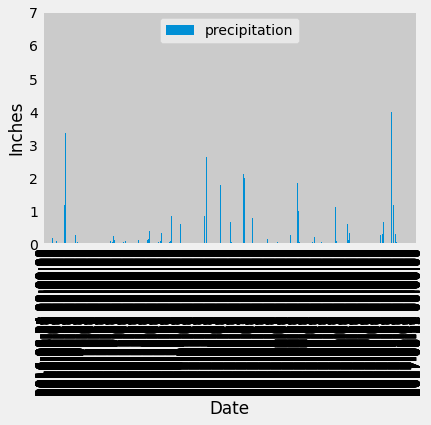

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
query_DF.plot.bar(y='precipitation', use_index=True)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(ticks=None)
plt.show

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_DF.describe()

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [13]:
# Design a query to calculate the total number stations in the dataset
engine.execute("select count(station) from station").fetchall()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute("select station, count(station) as Frequency from measurement group by station ORDER BY COUNT(station) DESC").fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = []
temp_stats.append(engine.execute("select MAX(tobs) as High_Temp from measurement where station = 'USC00519281'").fetchall())
temp_stats.append(engine.execute("select MIN(tobs) as Low_Temp from measurement where station = 'USC00519281'").fetchall())
temp_stats.append(engine.execute("select AVG(tobs) as Average_Temp from measurement where station = 'USC00519281'").fetchall())
temp_stats

[[(85.0,)], [(54.0,)], [(71.66378066378067,)]]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_DF = pd.DataFrame(engine.execute("select date, tobs from measurement where date > '2016-08-23' and station = 'USC00519281'").fetchall())
station_DF.columns = ['date', 'temperature']
station_DF['temperature'] = station_DF['temperature'].fillna(0)
station_DF['date'] = pd.to_datetime(station_DF['date'])
station_DF.sort_values(by='date', ignore_index=True, inplace=True)
station_DF.set_index('date', inplace=True)
station_DF

,temperature
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


Text(0.5, 0, 'Temperature')

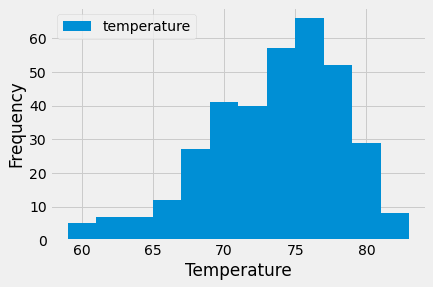

In [17]:
station_DF.plot.hist(by='temperature', bins=12)
plt.xlabel('Temperature')

In [18]:
# Close Session
session.close()